# Planning Stage: Data Description & Exploratory Data Analysis and Visualization (individual assignment 1)

In [1]:
library(tidyverse)
library(dplyr)
library(GGally)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [2]:
data <- read_csv("Employee.csv")
head(data)

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


In [3]:
summary(data)

  Education          JoiningYear       City            PaymentTier   
 Length:4653        Min.   :2012   Length:4653        Min.   :1.000  
 Class :character   1st Qu.:2013   Class :character   1st Qu.:3.000  
 Mode  :character   Median :2015   Mode  :character   Median :3.000  
                    Mean   :2015                      Mean   :2.698  
                    3rd Qu.:2017                      3rd Qu.:3.000  
                    Max.   :2018                      Max.   :3.000  
      Age           Gender          EverBenched       
 Min.   :22.00   Length:4653        Length:4653       
 1st Qu.:26.00   Class :character   Class :character  
 Median :28.00   Mode  :character   Mode  :character  
 Mean   :29.39                                        
 3rd Qu.:32.00                                        
 Max.   :41.00                                        
 ExperienceInCurrentDomain   LeaveOrNot    
 Min.   :0.000             Min.   :0.0000  
 1st Qu.:2.000             1st Qu.:0.

## Data Description:

The dataset for this project was obtained from https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset?resource=download. 

This dataset contains information about employees in a company with 4653 observations and 9 variables.
1. **Education**(categorical): The educational qualifications of employees, including degree, institution, and field of study.
2. **JoiningYear**(categorical): The year each employee joined the company, indicating their length of service.
3. **City**(categorical): The location or city where each employee is based or works.
4. **PaymentTier**(categorical): Categorization of employees into different salary tiers.
5. **Age**(numeric): The age of each employee, providing demographic insights.
6. **Gender**(categorical): Gender identity of employees, promoting diversity analysis.
7. **EverBenched**(categorical): Indicates if an employee has ever been temporarily without assigned work.
8. **ExperienceInCurrentDomain**(numeric): The number of years of experience employees have in their current field.
9. **LeaveOrNot**(categorical): Binary show the employee whether leave or not.

This dataset can be used for various HR and workforce-related analyses, including employee retention, salary structure assessments, diversity and inclusion studies, and leave pattern analyses. Researchers, data analysts, and HR professionals can gain valuable insights from this dataset.

## Question:

**Does leave or not depend on the education level, joining year, and payment tier?**

In this question, the **response variable** (variable of interest) is "LeaveOrNot" (binary: 1 = left the company, 0 = stayed). The **explanatory variables** could include "Education", "JoiningYear", and "PaymentTier".

The data will help address this question by allowing us to analyze patterns and correlations between these explanatory variables and the likelihood of an employee leaving. By examining these relationships, we can identify significant predictors of employee turnover and understand which factors are associated with higher retention or turnover rates. This question is focused more on inference

## Exploratory Data Analysis and Visualization

In [4]:
leave <- data |>
    select(Education, JoiningYear, PaymentTier, LeaveOrNot) |>
    mutate(JoiningYear = as.character(JoiningYear),
          PaymentTier = as.character(PaymentTier),
          LeaveOrNot = as.character(LeaveOrNot))
head(leave)

Education,JoiningYear,PaymentTier,LeaveOrNot
<chr>,<chr>,<chr>,<chr>
Bachelors,2017,3,0
Bachelors,2013,1,1
Bachelors,2014,3,0
Masters,2016,3,1
Masters,2017,3,1
Bachelors,2016,3,0


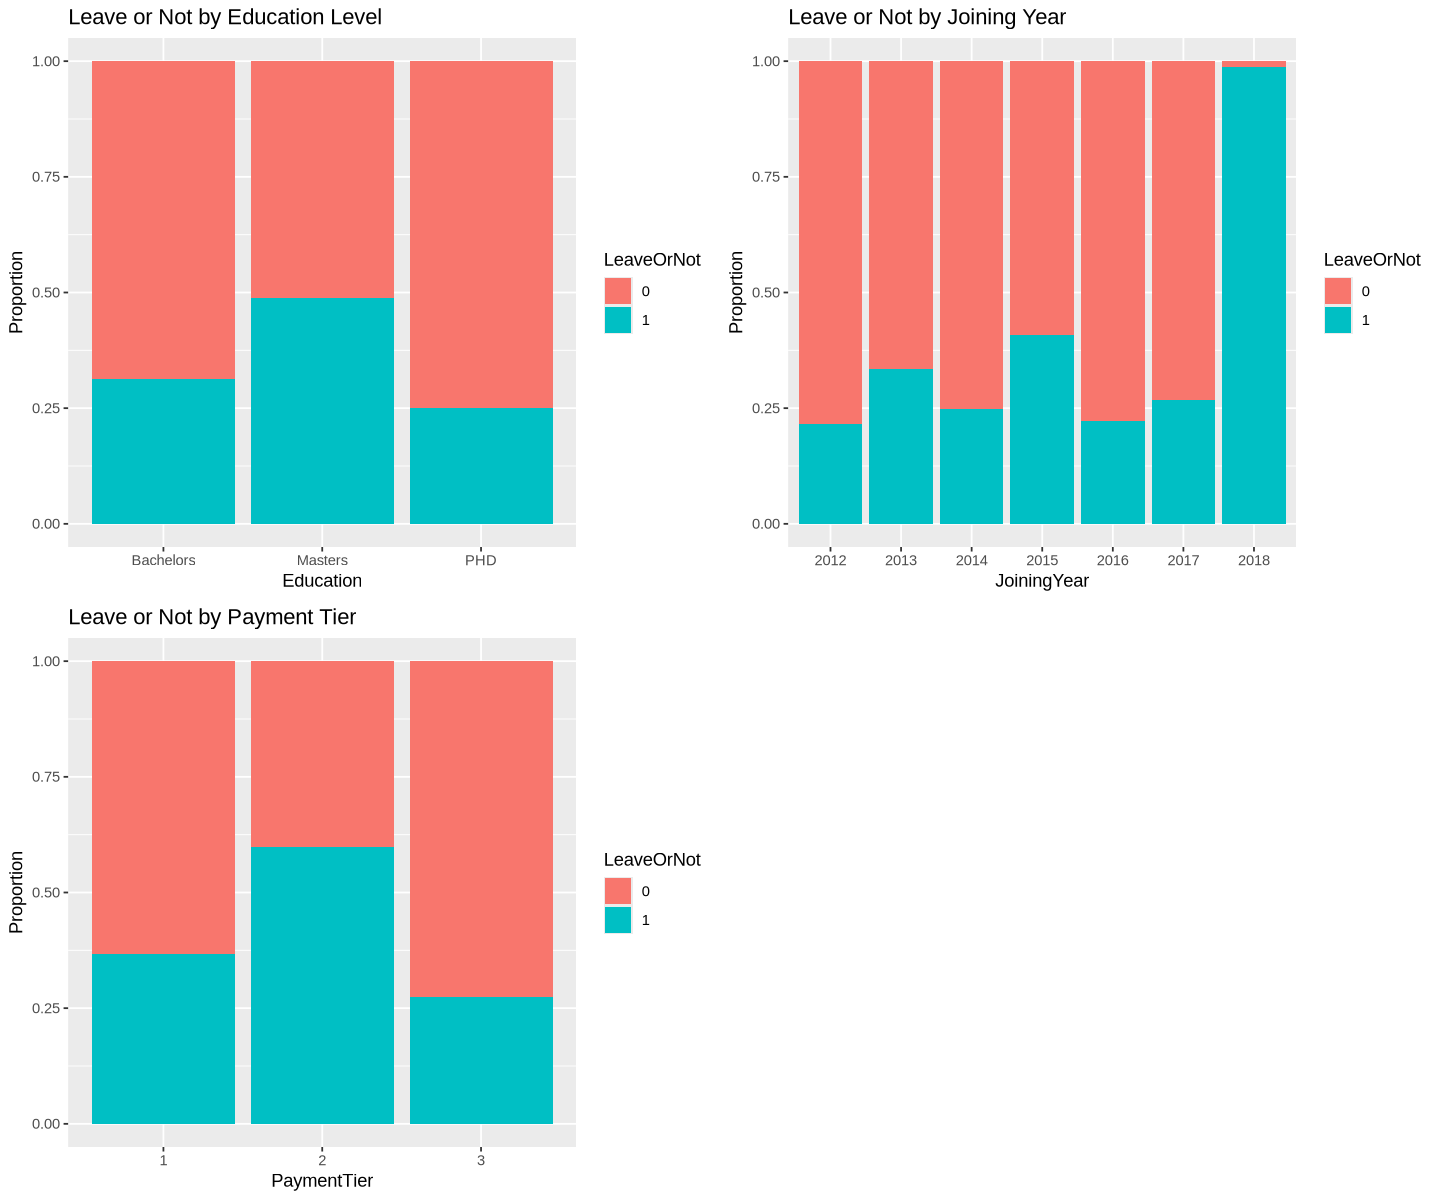

In [5]:
education_barChart <-  
    ggplot(leave, aes(x = Education, fill = LeaveOrNot)) +
    geom_bar(position = "fill") +
    labs(y = "Proportion", title = "Leave or Not by Education Level")
joiningYear_barChart <-  
    ggplot(leave, aes(x = JoiningYear, fill = LeaveOrNot)) +
    geom_bar(position = "fill") +
    labs(y = "Proportion", title = "Leave or Not by Joining Year")
paymentTier_barChart <-  
    ggplot(leave, aes(x = PaymentTier, fill = LeaveOrNot)) +
    geom_bar(position = "fill") +
    labs(y = "Proportion", title = "Leave or Not by Payment Tier")
# put plot together
options(repr.plot.width = 12, repr.plot.height = 10)
plot_grid(education_barChart, joiningYear_barChart, paymentTier_barChart)

- Education Level Plot: This plot helps us observe the turnover rate by education level. We can see differences in the proportions of employees who leave across Bachelors, Masters, and PhD holders. This allows us to explore if higher or lower education levels are associated with a higher likelihood of leaving.

- Joining Year Plot: By looking at turnover by JoiningYear, we can assess if employees who joined in certain years are more likely to leave. This may reveal trends in employee retention over time.

- Payment Tier Plot: The plot for PaymentTier shows the proportion of employees leaving at different payment levels. This is relevant because it allows us to investigate whether compensation level correlates with retention, revealing if employees of different payment tier are more likely to stay or leave.

These plots are relevant because they give a visual overview of potential relationships between each categorical variable and LeaveOrNot. Such trends are crucial for identifying patterns and developing hypotheses about factors influencing employee turnover.